In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pyanom.structure_learning import DirectLearningSparseChanges

## Prepare Data

In [8]:
def prepare_data():
    mu_n = [0, 0, 0]
    sigma_n = [
        [0.75, -0.5,  0.25],
        [-0.5,  1., -0.5],
        [0.25, -0.5,  0.75]]
    X_normal = np.random.multivariate_normal(
        [0, 0, 0], sigma_n, 10000)

    mu_e = [0, 0, 0]
    sigma_e = [
        [0.75,  0.25, -0.5],
        [0.25,  0.75, -0.5],
        [-0.5, -0.5,  1.]]
    X_error = np.random.multivariate_normal(
        [0, 0, 0], sigma_e, 10000)

    labels = ["col0", "col1", "col2"]
    return X_normal, X_error, labels

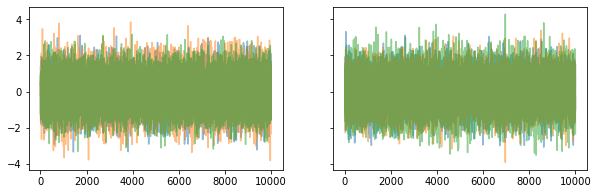

In [9]:
X_normal, X_error, labels = prepare_data()

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

ax[0].plot(X_normal, alpha=0.5)
ax[1].plot(X_error, alpha=0.5)
plt.show()

## Training

In [10]:
model = DirectLearningSparseChanges(
    lambda1=0.1, lambda2=0.3, max_iter=10000)
model.fit(X_normal, X_error)

DirectLearningSparseChanges(lambda1=0.1, lambda2=0.3, max_iter=10000)

## Inference

In [11]:
pmatrix_diff = model.get_sparse_changes()

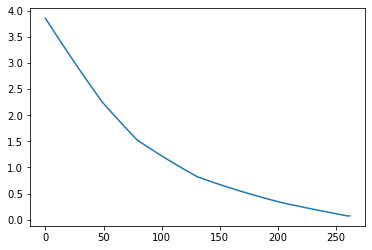

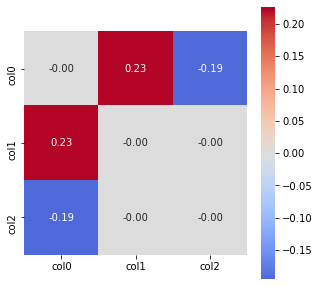

In [12]:
# 学習経過
plt.plot(model._loss)
plt.show()

# 可視化
plt.figure(figsize=(5, 5))
sns.heatmap(pmatrix_diff, xticklabels=labels,
            yticklabels=labels, cmap="coolwarm", center=0,
            annot=True, square=True, fmt='.2f')
plt.show()